In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score


In [2]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

In [3]:
import warnings
warnings.filterwarnings('ignore')

###### Reading Data

In [4]:
bikedf=pd.read_csv('day.csv')

In [5]:
bikedf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bikedf.shape

(730, 16)

In [7]:
#16 columns 730 records

In [8]:
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
#no null values
#int64 ,object and float variables


# Data Cleaning

In [10]:
 #column instant irrelevent
#column dteday in just redundant column because the year month and weekday exist already
#so we are dropping both

In [11]:
bikedf = bikedf.drop(['instant', 'dteday','casual','registered'], axis=1)

In [12]:
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [13]:
#checking outliers anomalies

In [14]:
bikedf.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [15]:
#OBESERVATION
#season , yr , month , weekday working day and weathersit are categorical 
#temp is showing maximum of 35 degree celsius and min of 2 c
#atemp is showing maximum of 42 C and min of 3.9 C



## converting the columns according to data dictionary
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- mnth : month ( 1 to 12)
- weekday : day of the week
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [16]:
#converting seasons
bikedf['season']=bikedf['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [17]:
#converting months
bikedf['mnth']=bikedf['mnth'].map({1:'January',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [18]:
#Coverting weekday
bikedf['weekday']=bikedf['weekday'].map({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [19]:
#Converting weathersit
bikedf['weathersit']=bikedf['weathersit'].map({1:'Clear_partly_cloudy',2:'Mist_Cloudy',3:'Light_Snow-rain',4:'Heavy_Rain_Snow'})

## EDA 

In [20]:
bikedf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear_partly_cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear_partly_cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear_partly_cloudy,9.305237,11.46350,43.6957,12.522300,1600




## Univariate Analysis

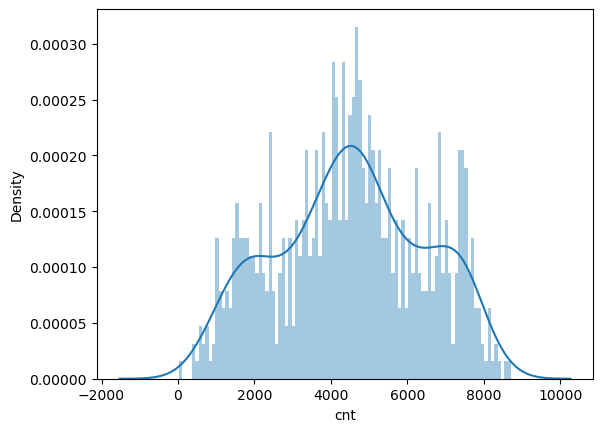

In [21]:
#density 
sns.distplot(bikedf['cnt'],bins=100)
plt.show()

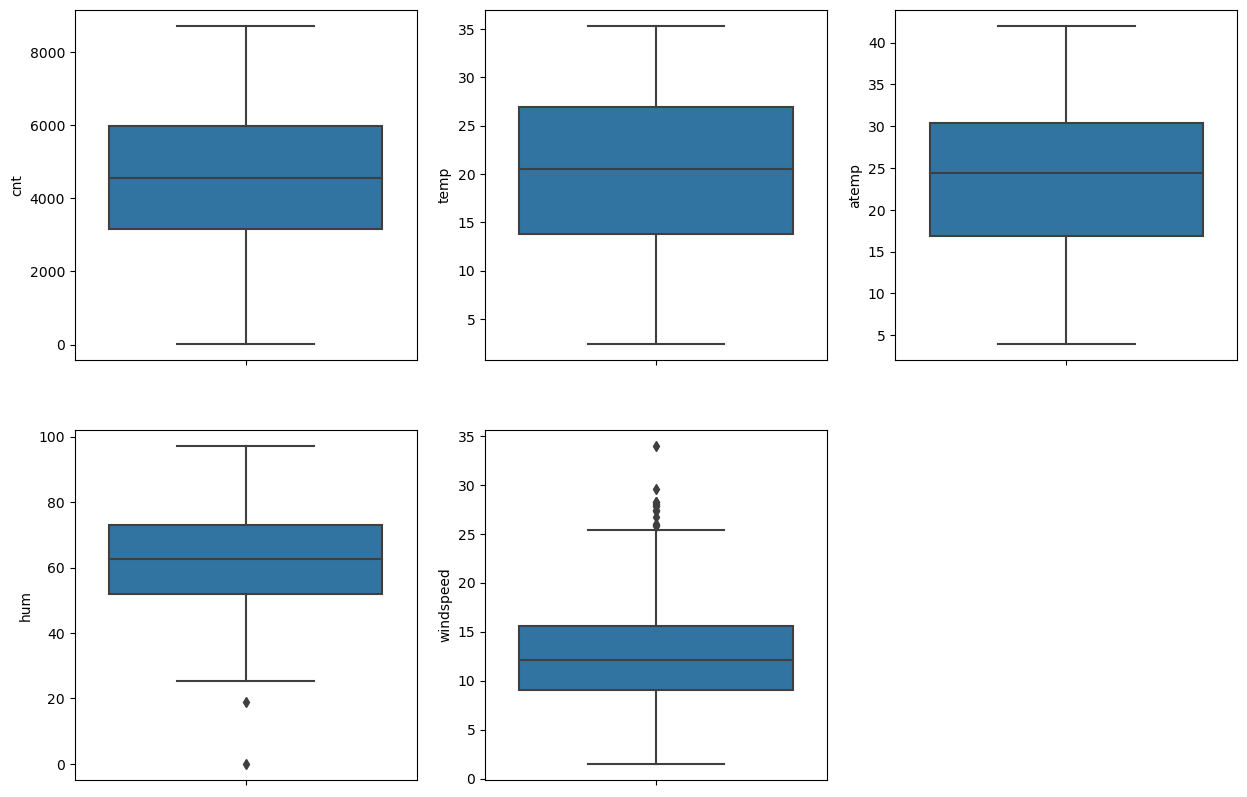

In [22]:
plt.figure(figsize=(15, 10))
plt.subplot(2,3,1)
sns.boxplot(y=bikedf.cnt)
plt.subplot(2,3,2)
sns.boxplot(y=bikedf['temp'])
plt.subplot(2,3,3)
sns.boxplot(y=bikedf['atemp'])
plt.subplot(2,3,4)
sns.boxplot(y=bikedf['hum'])
plt.subplot(2,3,5)
sns.boxplot(y=bikedf['windspeed'])
plt.show()

In [23]:
#observation
#cnt, temp , atemp are showing no outliers 
# windspeed and humidity is showing some outliers but these are pausible values

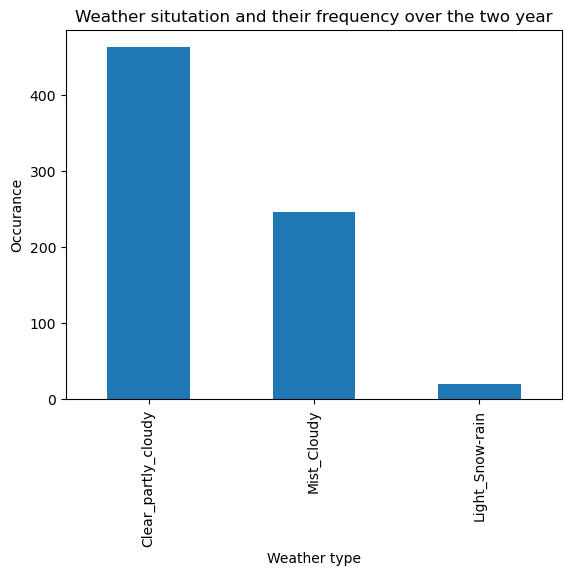

In [24]:
bikedf["weathersit"].value_counts().plot.bar()
plt.title("Weather situtation and their frequency over the two year")
plt.xlabel('Weather type' )
plt.ylabel('Occurance')
plt.show()

In [25]:
#OBSERVATION
#Most of the day are clear_partly_cloudy or Misty-cloudy
#very low amount of light_snow days
#heavy rain is not a hasnt shown up in 2 years

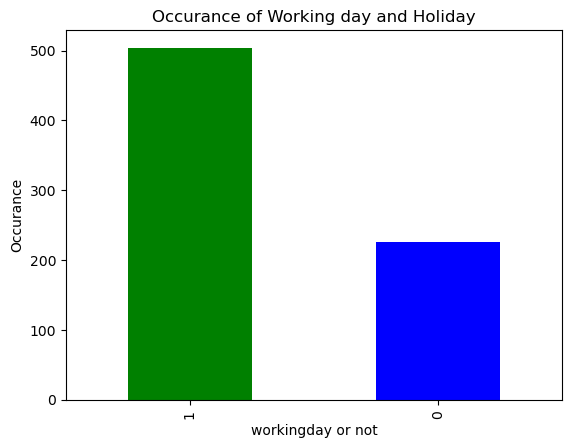

In [26]:
#Working day and holiday count

bikedf["workingday"].value_counts().plot.bar(color=["Green","Blue"])
plt.title("Occurance of Working day and Holiday")
plt.xlabel('workingday or not' )
plt.ylabel('Occurance')
plt.show()

In [27]:
#around 500 working days and 200 holidays

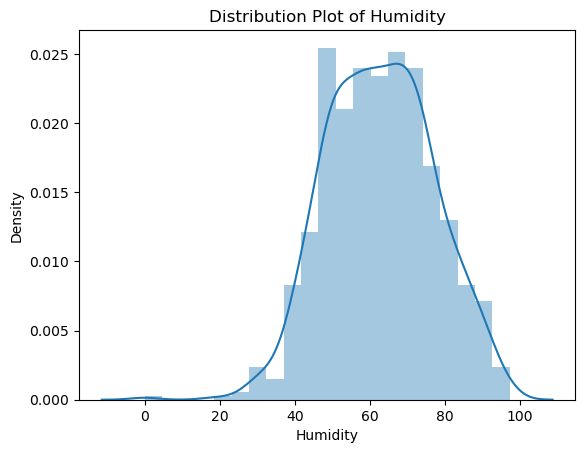

In [28]:
#Distribution of humidity

sns.distplot(bikedf['hum'])
plt.title("Distribution Plot of Humidity")
plt.xlabel('Humidity' )
plt.show()

In [29]:
#Observation
#Humidity is hovering around 40 and 80 most of the days and very rarely dips to 0 and rises to 100 or above

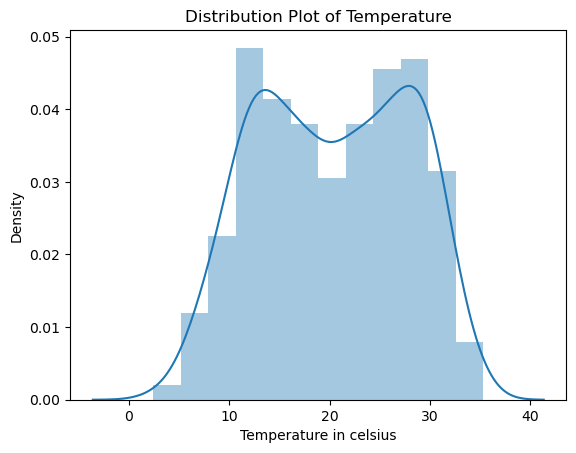

In [30]:
#Temperature distribution

sns.distplot(bikedf['temp'])
plt.title("Distribution Plot of Temperature")
plt.xlabel('Temperature in celsius' )
plt.show()

In [31]:
#Observation
#temperature is mostly beteen 10 and 30 

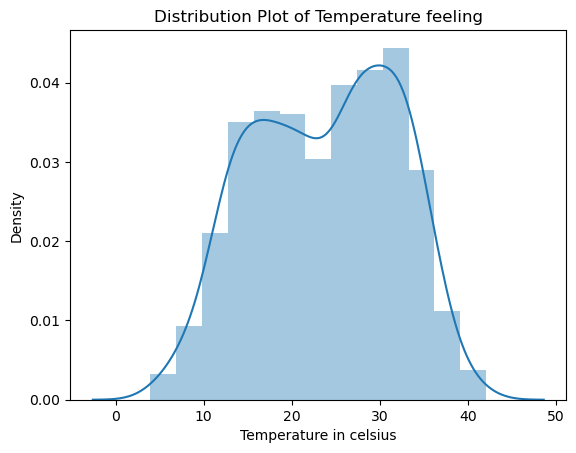

In [32]:
#Distribution plot of temperature feeling
sns.distplot(bikedf['atemp'])
plt.title("Distribution Plot of Temperature feeling")
plt.xlabel('Temperature in celsius' )
plt.show()

In [33]:
#somewhat similar to to temperature and shows almost the same trend as it is highly correlated

## Bivariate Analysis

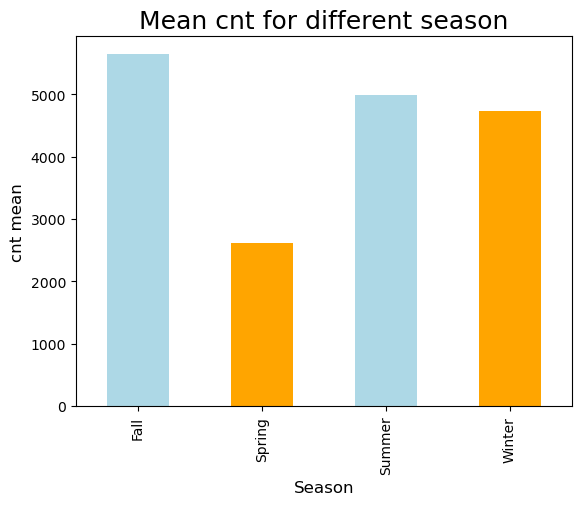

In [34]:
#Mean cnt  for different Season graph
bikedf.groupby("season")["cnt"].mean().plot.bar(color=["LightBlue","Orange"])
plt.xlabel("Season",size=12)
plt.ylabel("cnt mean",size=12)
plt.title("Mean cnt for different season", size=18)
plt.show()

In [35]:
#OBESERVATION
#Spring shows the least amount of users  while summer and winter is showing similar values
#fall is having highest count of users

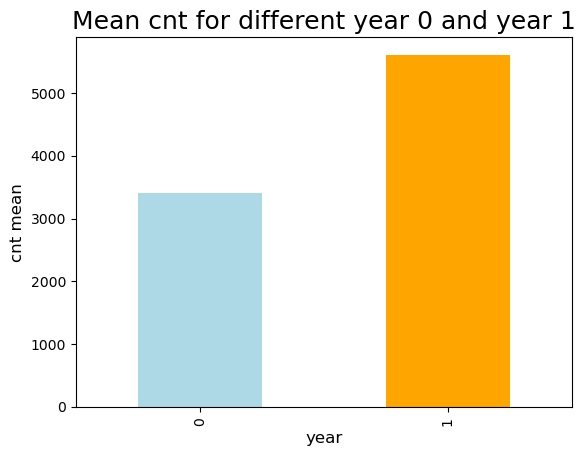

In [36]:
bikedf.groupby("yr")["cnt"].mean().plot.bar(color=["LightBlue","Orange"])
plt.xlabel("year",size=12)
plt.ylabel("cnt mean",size=12)
plt.title("Mean cnt for different year 0 and year 1", size=18)
plt.show()

In [37]:
#OBSERVATION
#yr 2 is having more users per day  than yr 1

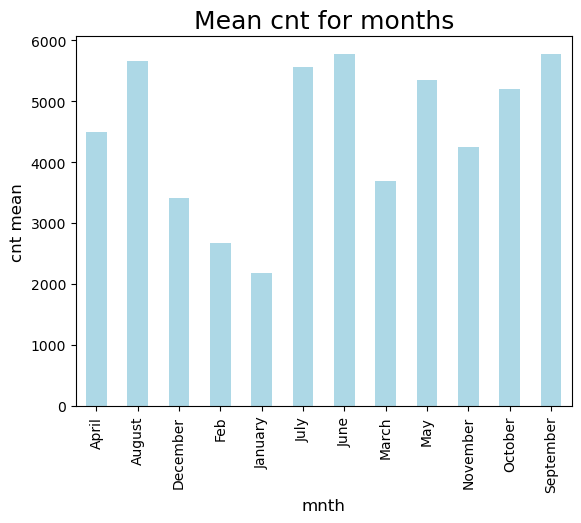

In [38]:
#Mean of user per month
bikedf.groupby("mnth")["cnt"].mean().plot.bar(color=["LightBlue"])
plt.xlabel("mnth",size=12)
plt.ylabel("cnt mean",size=12)
plt.title("Mean cnt for months", size=18)
plt.show()

In [39]:
#jan feb and december is showing low users
#sotember ,aug,  july ,june and may are showing higher user count

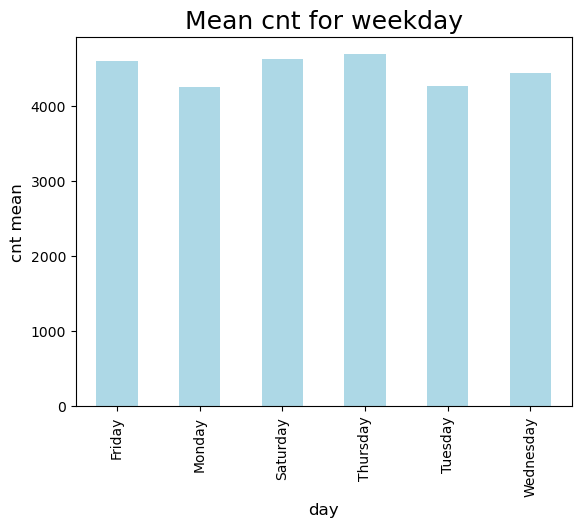

In [40]:
#Mean amount of user in weekdays

bikedf.groupby("weekday")["cnt"].mean().plot.bar(color=["LightBlue"])
plt.xlabel("day",size=12)
plt.ylabel("cnt mean",size=12)
plt.title("Mean cnt for weekday", size=18)
plt.show()

In [41]:
#showing almost same trend in all given days

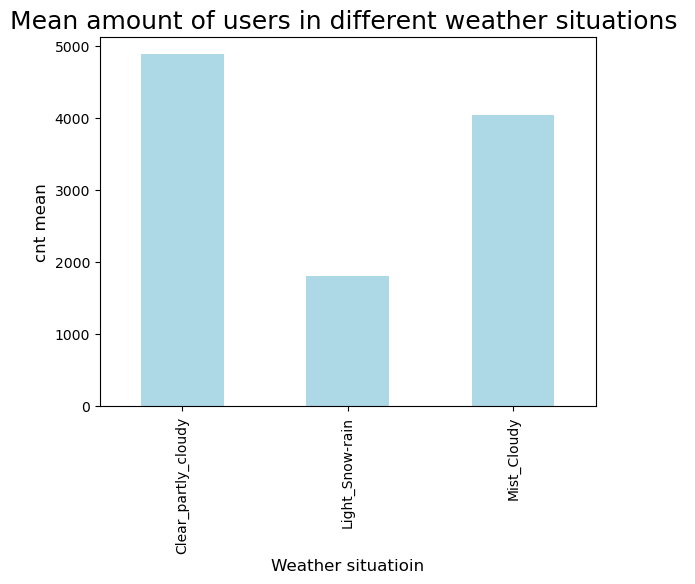

In [42]:
bikedf.groupby("weathersit")["cnt"].mean().plot.bar(color=["LightBlue"])
plt.xlabel("Weather situatioin",size=12)
plt.ylabel("cnt mean",size=12)
plt.title("Mean amount of users in different weather situations ", size=18)
plt.show()

In [43]:
#light snow is having low count of users
#heavy rain is showing no users

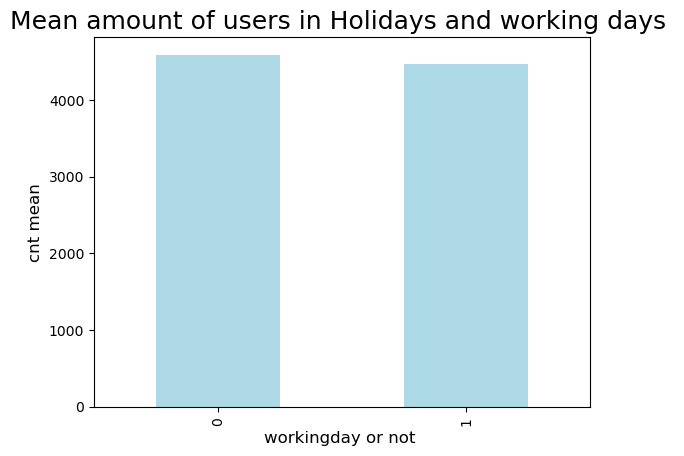

In [44]:
#Working day and Cnt mean
bikedf.groupby("workingday")["cnt"].mean().plot.bar(color=["LightBlue"])
plt.xlabel("workingday or not ",size=12)
plt.ylabel("cnt mean",size=12)
plt.title("Mean amount of users in Holidays and working days ", size=18)
plt.show()

In [45]:
#obeservation
#both are showing similar result

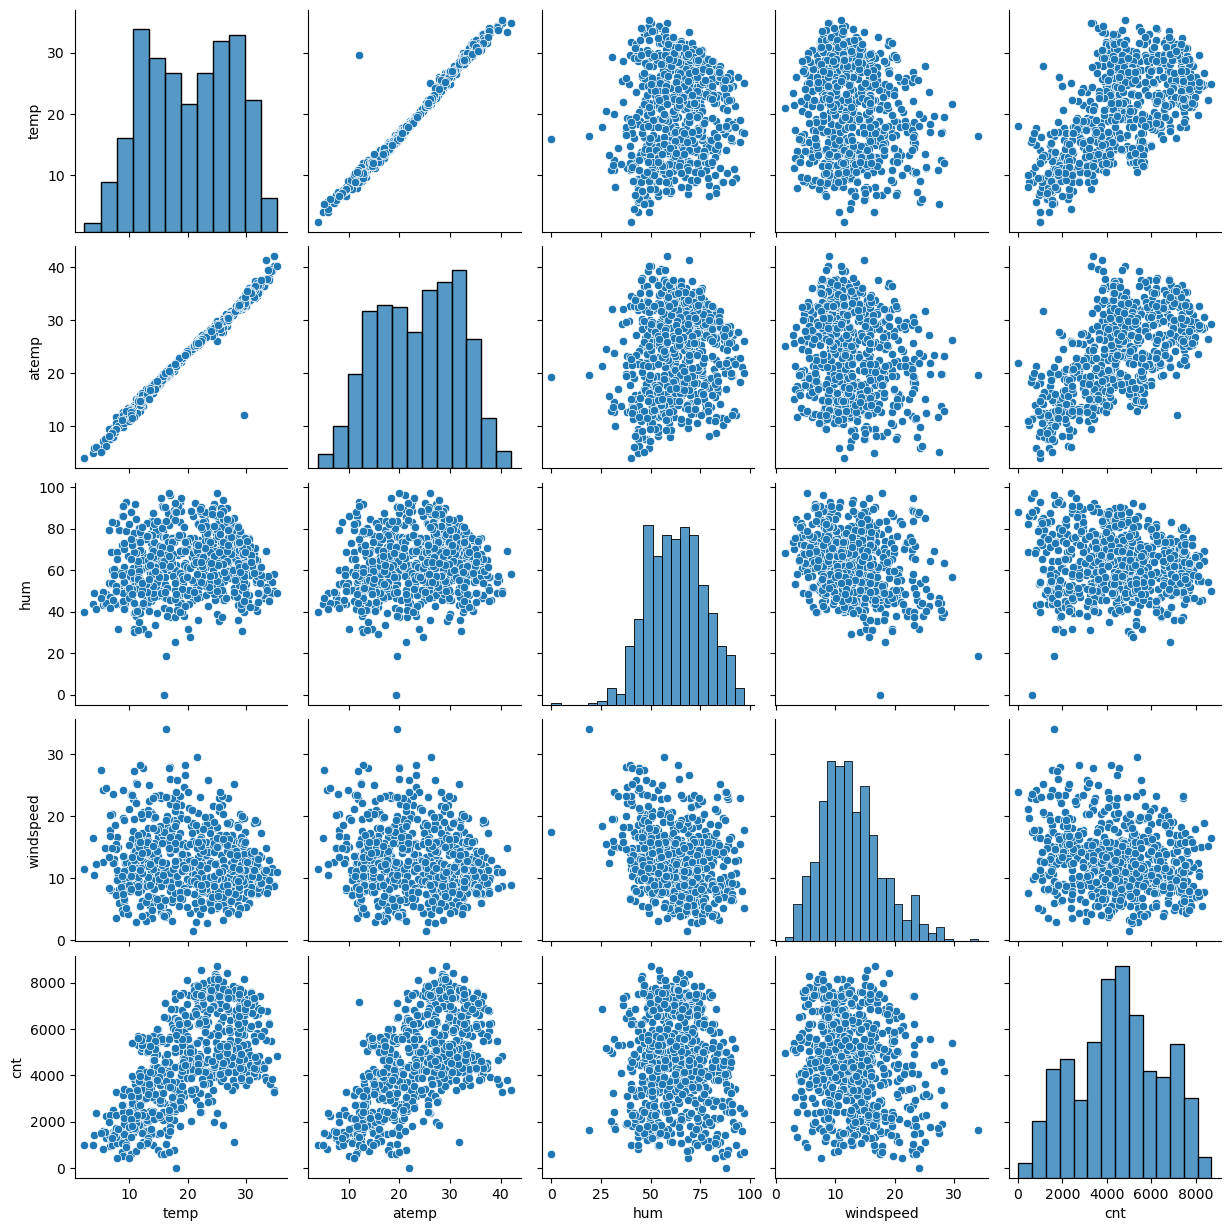

In [46]:
sns.pairplot(bikedf[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']])
plt.show()

In [47]:
#linear correlation between atemp and temp
#there is some amount of correlation between temp and cnt

## creating dummy variables


In [48]:
bikedf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear_partly_cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear_partly_cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear_partly_cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [49]:
status=pd.get_dummies(bikedf['season'], drop_first=True)

In [50]:
bikedf=pd.concat([bikedf,status], axis=1)

In [51]:
bikedf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,Spring,0,January,0,Monday,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,Spring,0,January,0,Tuesday,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,Spring,0,January,0,Wednesday,1,Clear_partly_cloudy,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,Spring,0,January,0,Thursday,1,Clear_partly_cloudy,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,Spring,0,January,0,Friday,1,Clear_partly_cloudy,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [52]:
status=pd.get_dummies(bikedf['mnth'], drop_first=True)
bikedf=pd.concat([bikedf,status], axis=1)

In [53]:
bikedf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,Feb,January,July,June,March,May,November,October,September
0,Spring,0,January,0,Monday,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Spring,0,January,0,Tuesday,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Spring,0,January,0,Wednesday,1,Clear_partly_cloudy,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Spring,0,January,0,Thursday,1,Clear_partly_cloudy,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Spring,0,January,0,Friday,1,Clear_partly_cloudy,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [54]:
status=pd.get_dummies(bikedf['weekday'],drop_first=True)


In [55]:
bikedf=pd.concat([bikedf,status], axis=1)
bikedf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,Feb,January,July,June,March,May,November,October,September,Monday,Saturday,Thursday,Tuesday,Wednesday
0,Spring,0,January,0,Monday,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,Spring,0,January,0,Tuesday,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,Spring,0,January,0,Wednesday,1,Clear_partly_cloudy,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,Spring,0,January,0,Thursday,1,Clear_partly_cloudy,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,Spring,0,January,0,Friday,1,Clear_partly_cloudy,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
status=pd.get_dummies(bikedf['weathersit'], drop_first=True)
bikedf=pd.concat([bikedf,status], axis=1)
bikedf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,Feb,January,July,June,March,May,November,October,September,Monday,Saturday,Thursday,Tuesday,Wednesday,Light_Snow-rain,Mist_Cloudy
0,Spring,0,January,0,Monday,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,Spring,0,January,0,Tuesday,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,Spring,0,January,0,Wednesday,1,Clear_partly_cloudy,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Spring,0,January,0,Thursday,1,Clear_partly_cloudy,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Spring,0,January,0,Friday,1,Clear_partly_cloudy,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
bikedf = bikedf.drop(['season', 'mnth','weekday','weathersit'], axis=1)


In [58]:
bikedf.shape

(730, 29)

In [59]:
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   Spring           730 non-null    uint8  
 9   Summer           730 non-null    uint8  
 10  Winter           730 non-null    uint8  
 11  August           730 non-null    uint8  
 12  December         730 non-null    uint8  
 13  Feb              730 non-null    uint8  
 14  January          730 non-null    uint8  
 15  July             730 non-null    uint8  
 16  June             730 non-null    uint8  
 17  March           

## Splitting

In [60]:

np.random.seed(0)
df_train,df_test=train_test_split(bikedf,train_size=0.70,test_size=0.30,random_state=333)


In [61]:
#Checking

In [62]:
bikedf.shape

(730, 29)

In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int64  
 1   holiday          510 non-null    int64  
 2   workingday       510 non-null    int64  
 3   temp             510 non-null    float64
 4   atemp            510 non-null    float64
 5   hum              510 non-null    float64
 6   windspeed        510 non-null    float64
 7   cnt              510 non-null    int64  
 8   Spring           510 non-null    uint8  
 9   Summer           510 non-null    uint8  
 10  Winter           510 non-null    uint8  
 11  August           510 non-null    uint8  
 12  December         510 non-null    uint8  
 13  Feb              510 non-null    uint8  
 14  January          510 non-null    uint8  
 15  July             510 non-null    uint8  
 16  June             510 non-null    uint8  
 17  March         

In [64]:
df_test.shape

(219, 29)

In [65]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               219 non-null    int64  
 1   holiday          219 non-null    int64  
 2   workingday       219 non-null    int64  
 3   temp             219 non-null    float64
 4   atemp            219 non-null    float64
 5   hum              219 non-null    float64
 6   windspeed        219 non-null    float64
 7   cnt              219 non-null    int64  
 8   Spring           219 non-null    uint8  
 9   Summer           219 non-null    uint8  
 10  Winter           219 non-null    uint8  
 11  August           219 non-null    uint8  
 12  December         219 non-null    uint8  
 13  Feb              219 non-null    uint8  
 14  January          219 non-null    uint8  
 15  July             219 non-null    uint8  
 16  June             219 non-null    uint8  
 17  March          

## RESCALING  Training set

In [66]:
scaler=MinMaxScaler()

In [67]:
num_var=['temp','atemp','hum','windspeed','cnt']

In [68]:
df_train[num_var]=scaler.fit_transform(df_train[num_var])

In [69]:
#checking
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,Feb,January,July,June,March,May,November,October,September,Monday,Saturday,Thursday,Tuesday,Wednesday,Light_Snow-rain,Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,0.540901,0.515631,0.647390,0.346318,0.515144,0.24902,0.247059,0.241176,0.098039,0.076471,0.082353,0.084314,0.078431,0.072549,0.078431,0.092157,0.086275,0.084314,0.082353,0.143137,0.143137,0.139216,0.152941,0.131373,0.025490,0.341176
std,0.500487,0.151726,0.462054,0.227898,0.213626,0.149722,0.160266,0.224281,0.43287,0.431725,0.428217,0.297660,0.266010,0.275172,0.278131,0.269113,0.259649,0.269113,0.289531,0.281045,0.278131,0.275172,0.350557,0.350557,0.346511,0.360284,0.338139,0.157763,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


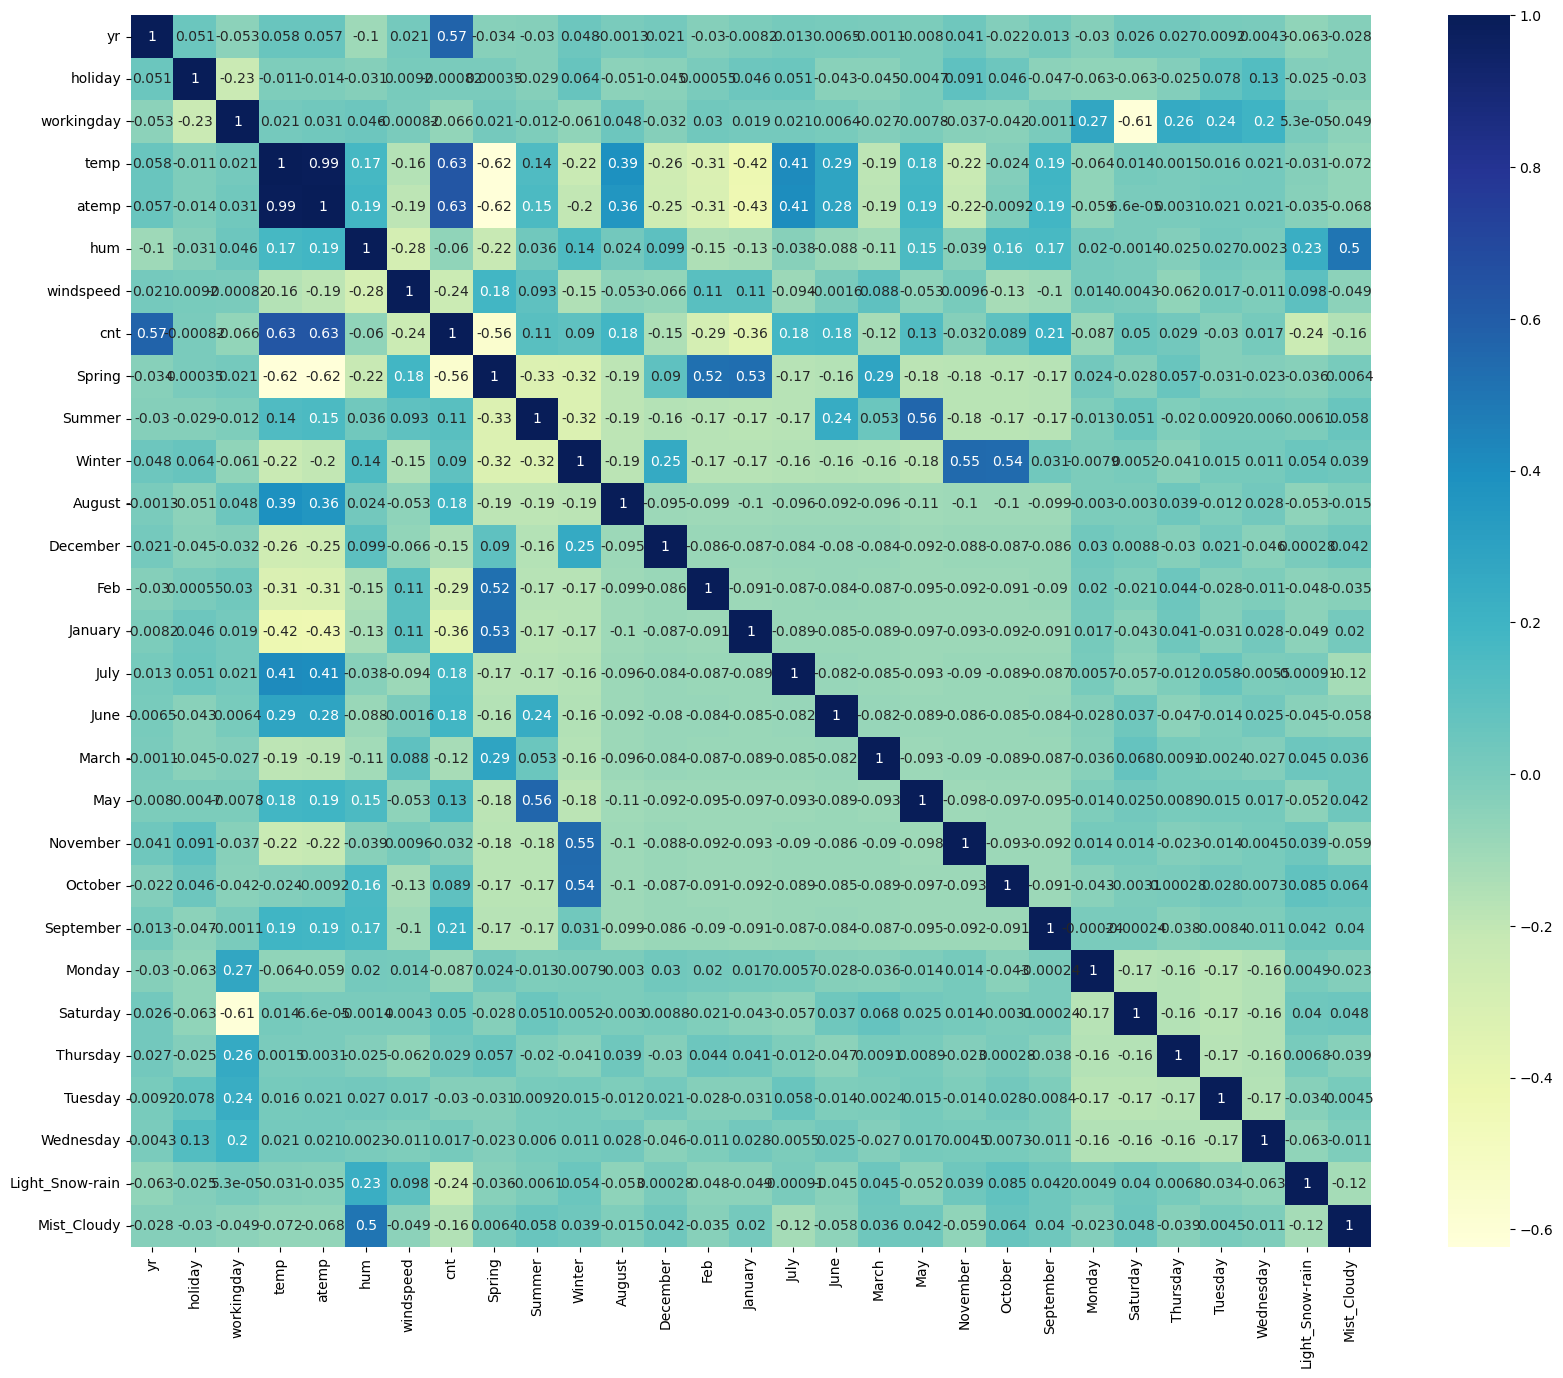

In [70]:
#plotting a correlation map

plt.figure(figsize=(20,16))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

## x_train and y_train split

In [71]:

y_train=df_train.pop('cnt')
x_train=df_train

In [72]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int64  
 1   holiday          510 non-null    int64  
 2   workingday       510 non-null    int64  
 3   temp             510 non-null    float64
 4   atemp            510 non-null    float64
 5   hum              510 non-null    float64
 6   windspeed        510 non-null    float64
 7   Spring           510 non-null    uint8  
 8   Summer           510 non-null    uint8  
 9   Winter           510 non-null    uint8  
 10  August           510 non-null    uint8  
 11  December         510 non-null    uint8  
 12  Feb              510 non-null    uint8  
 13  January          510 non-null    uint8  
 14  July             510 non-null    uint8  
 15  June             510 non-null    uint8  
 16  March            510 non-null    uint8  
 17  May           

## RFE

In [73]:
lm = LinearRegression()
lm.fit(x_train,y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe=rfe.fit( x_train,y_train)

In [74]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', False, 12),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 10),
 ('Winter', True, 1),
 ('August', False, 7),
 ('December', True, 1),
 ('Feb', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('March', False, 6),
 ('May', False, 4),
 ('November', True, 1),
 ('October', False, 9),
 ('September', True, 1),
 ('Monday', False, 5),
 ('Saturday', False, 14),
 ('Thursday', False, 13),
 ('Tuesday', False, 3),
 ('Wednesday', False, 8),
 ('Light_Snow-rain', True, 1),
 ('Mist_Cloudy', True, 1)]

In [75]:
cols=x_train.columns[rfe.support_]
x_train.columns[~rfe.support_]
x_train_rfe=x_train[cols]

## MODELLING  1 

In [76]:
#using Statsmodel

In [77]:
x_train_lm1=sm.add_constant(x_train_rfe)
lm1=sm.OLS(y_train,x_train_lm1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     168.4
Date:                Tue, 02 May 2023   Prob (F-statistic):          3.83e-183
Time:                        19:50:56   Log-Likelihood:                 500.95
No. Observations:                 510   AIC:                            -969.9
Df Residuals:                     494   BIC:                            -902.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3929      0.033     11.763      0.000       0.327       0.459
yr                  0.2304      0.008     27.757      0.000       0.214       0.247
temp                0.2933      0.131      2.243      0.025       0.036       0.550
atemp               0.1333      0.138      0.968      0.333      -0.137       0.404
hum                -0.1709      0.038     -4.481      0.000      -0.246      -0.096
windspeed          -0.1826      0.028     -6.452      0.000      -0.238      -0.127
Spring             -0.0887      0.019     -4.748      0.000      -0.125      -0.052
Winter              0.0762      0.014      5.327      0.000       0.048       0.104
December           -0.0693      0.019     -3.646      0.000      -0.107      -0.032
Feb                -0.0490      0.022     -2.272      0.023      -0.091      -0.007
January            -0.0689      0.022     -3.118      0.002      -0.112      -0.025
July               -0.0498      0.017     -2.866      0.004      -0.084      -0.016
November           -0.0715      0.019     -3.713      0.000      -0.109      -0.034
September           0.0595      0.016      3.788      0.000       0.029       0.090
Light_Snow-rain    -0.2641      0.029     -9.151      0.000      -0.321      -0.207
Mist_Cloudy        -0.0474      0.011     -4.369      0.000      -0.069      -0.026
==============================================================================
Omnibus:                       85.349   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.893
Skew:                          -0.841   Prob(JB):                     4.84e-48
Kurtosis:                       5.724   Cond. No.                         75.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
#VIF
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,temp,353.54
2,atemp,352.02
3,hum,23.93
4,windspeed,5.15
5,Spring,4.56
6,Winter,2.77
9,January,2.42
14,Mist_Cloudy,2.29
8,Feb,2.28
0,yr,2.05


In [79]:
#atemp  is showing high P value and vif value
#dropping atemp


In [80]:
x_train_rfe=x_train_rfe.drop('atemp' , axis=1)

## MODEL 2

In [81]:
#checking again
x_train_lm2=sm.add_constant(x_train_rfe)
lm2=sm.OLS(y_train,x_train_lm2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     180.4
Date:                Tue, 02 May 2023   Prob (F-statistic):          4.46e-184
Time:                        19:50:56   Log-Likelihood:                 500.47
No. Observations:                 510   AIC:                            -970.9
Df Residuals:                     495   BIC:                            -907.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3959      0.033     11.907      0.000       0.331       0.461
yr                  0.2305      0.008     27.763      0.000       0.214       0.247
temp                0.4156      0.034     12.344      0.000       0.349       0.482
hum                -0.1688      0.038     -4.434      0.000      -0.244      -0.094
windspeed          -0.1873      0.028     -6.717      0.000      -0.242      -0.133
Spring             -0.0886      0.019     -4.743      0.000      -0.125      -0.052
Winter              0.0772      0.014      5.414      0.000       0.049       0.105
December           -0.0698      0.019     -3.676      0.000      -0.107      -0.033
Feb                -0.0492      0.022     -2.284      0.023      -0.092      -0.007
January            -0.0704      0.022     -3.192      0.002      -0.114      -0.027
July               -0.0498      0.017     -2.864      0.004      -0.084      -0.016
November           -0.0722      0.019     -3.755      0.000      -0.110      -0.034
September           0.0586      0.016      3.740      0.000       0.028       0.089
Light_Snow-rain    -0.2652      0.029     -9.199      0.000      -0.322      -0.209
Mist_Cloudy        -0.0477      0.011     -4.404      0.000      -0.069      -0.026
==============================================================================
Omnibus:                       84.095   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.671
Skew:                          -0.830   Prob(JB):                     2.43e-47
Kurtosis:                       5.711   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
#checking VIF again
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,hum,23.42
1,temp,16.95
3,windspeed,5.04
4,Spring,4.55
5,Winter,2.74
8,January,2.41
7,Feb,2.28
13,Mist_Cloudy,2.28
0,yr,2.05
10,November,1.87


In [83]:
#hum is showing high vif value  so dropping it
x_train_rfe=x_train_rfe.drop('hum' , axis=1)

## MODEL 3

In [84]:
x_train_lm3=sm.add_constant(x_train_rfe)
lm3=sm.OLS(y_train,x_train_lm3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.8
Date:                Tue, 02 May 2023   Prob (F-statistic):          4.71e-181
Time:                        19:50:56   Log-Likelihood:                 490.54
No. Observations:                 510   AIC:                            -953.1
Df Residuals:                     496   BIC:                            -893.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3036      0.026     11.493      0.000       0.252       0.356
yr                  0.2350      0.008     27.994      0.000       0.218       0.251
temp                0.3827      0.033     11.440      0.000       0.317       0.448
windspeed          -0.1523      0.027     -5.590      0.000      -0.206      -0.099
Spring             -0.0866      0.019     -4.552      0.000      -0.124      -0.049
Winter              0.0713      0.014      4.929      0.000       0.043       0.100
December           -0.0822      0.019     -4.293      0.000      -0.120      -0.045
Feb                -0.0541      0.022     -2.468      0.014      -0.097      -0.011
January            -0.0769      0.022     -3.430      0.001      -0.121      -0.033
July               -0.0423      0.018     -2.403      0.017      -0.077      -0.008
November           -0.0734      0.020     -3.746      0.000      -0.112      -0.035
September           0.0532      0.016      3.340      0.001       0.022       0.084
Light_Snow-rain    -0.3154      0.027    -11.671      0.000      -0.368      -0.262
Mist_Cloudy        -0.0757      0.009     -8.427      0.000      -0.093      -0.058
==============================================================================
Omnibus:                       85.688   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.666
Skew:                          -0.837   Prob(JB):                     2.70e-49
Kurtosis:                       5.779   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
#checking VIF again
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.24
2,windspeed,5.03
3,Spring,4.20
4,Winter,2.42
7,January,2.30
6,Feb,2.24
0,yr,2.04
9,November,1.82
12,Mist_Cloudy,1.53
5,December,1.52


In [86]:
#July  is showing +ve value so droppping that column
#temperature , windspeed, spring  is also having high vif value but it is very relevent factor that could contribute to cnt
x_train_rfe=x_train_rfe.drop('July' , axis=1)

## MODEL 4

In [87]:
x_train_lm4=sm.add_constant(x_train_rfe)
lm4=sm.OLS(y_train,x_train_lm4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     198.9
Date:                Tue, 02 May 2023   Prob (F-statistic):          5.69e-181
Time:                        19:50:56   Log-Likelihood:                 487.58
No. Observations:                 510   AIC:                            -949.2
Df Residuals:                     497   BIC:                            -894.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3145      0.026     12.027      0.000       0.263       0.366
yr                  0.2353      0.008     27.903      0.000       0.219       0.252
temp                0.3540      0.031     11.277      0.000       0.292       0.416
windspeed          -0.1480      0.027     -5.420      0.000      -0.202      -0.094
Spring             -0.0880      0.019     -4.607      0.000      -0.125      -0.050
Winter              0.0727      0.015      5.009      0.000       0.044       0.101
December           -0.0859      0.019     -4.480      0.000      -0.124      -0.048
Feb                -0.0572      0.022     -2.601      0.010      -0.100      -0.014
January            -0.0823      0.022     -3.676      0.000      -0.126      -0.038
November           -0.0769      0.020     -3.917      0.000      -0.115      -0.038
September           0.0597      0.016      3.789      0.000       0.029       0.091
Light_Snow-rain    -0.3177      0.027    -11.710      0.000      -0.371      -0.264
Mist_Cloudy        -0.0741      0.009     -8.232      0.000      -0.092      -0.056
==============================================================================
Omnibus:                       89.190   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.293
Skew:                          -0.868   Prob(JB):                     1.33e-51
Kurtosis:                       5.831   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
#checking vif

In [89]:
#checking VIF again
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.90
1,temp,4.25
3,Spring,4.19
4,Winter,2.38
7,January,2.29
6,Feb,2.24
0,yr,2.04
8,November,1.82
5,December,1.52
11,Mist_Cloudy,1.51


In [90]:
#Febis having +ve p value lets drop this 
x_train_rfe=x_train_rfe.drop('Feb' , axis=1)

## MODEL 5

In [91]:
x_train_lm5=sm.add_constant(x_train_rfe)
lm5=sm.OLS(y_train,x_train_lm5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.9
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.08e-180
Time:                        19:50:57   Log-Likelihood:                 484.14
No. Observations:                 510   AIC:                            -944.3
Df Residuals:                     498   BIC:                            -893.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3042      0.026     11.701      0.000       0.253       0.355
yr                  0.2351      0.008     27.726      0.000       0.218       0.252
temp                0.3679      0.031     11.828      0.000       0.307       0.429
windspeed          -0.1484      0.027     -5.400      0.000      -0.202      -0.094
Spring             -0.1143      0.016     -7.022      0.000      -0.146      -0.082
Winter              0.0703      0.015      4.822      0.000       0.042       0.099
December           -0.0692      0.018     -3.807      0.000      -0.105      -0.033
January            -0.0491      0.019     -2.654      0.008      -0.086      -0.013
November           -0.0698      0.020     -3.569      0.000      -0.108      -0.031
September           0.0604      0.016      3.813      0.000       0.029       0.092
Light_Snow-rain    -0.3116      0.027    -11.461      0.000      -0.365      -0.258
Mist_Cloudy        -0.0725      0.009     -8.030      0.000      -0.090      -0.055
==============================================================================
Omnibus:                       80.232   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.962
Skew:                          -0.783   Prob(JB):                     1.55e-46
Kurtosis:                       5.734   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.86
1,temp,4.22
4,Winter,2.33
3,Spring,2.28
0,yr,2.04
7,November,1.80
6,January,1.58
10,Mist_Cloudy,1.50
5,December,1.37
8,September,1.17


In [93]:
# This models seems to be good which has very low p values and VIF values of less than 5

### RESIDUAL ANALYSIS OF THE TRAIN DATA

In [94]:
y_train_cnt = lm5.predict(x_train_lm5)

Text(0.5, 0, 'Errors')

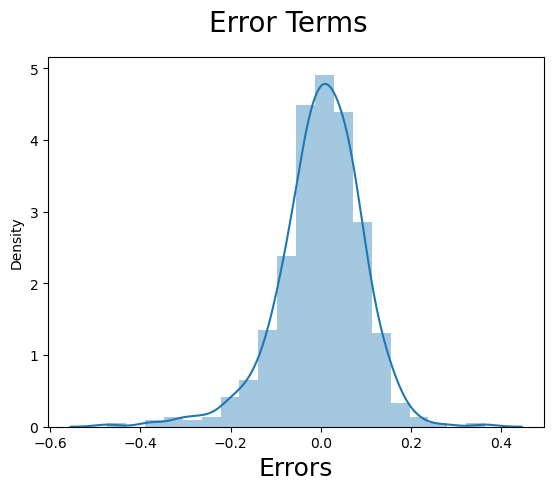

In [95]:

fig = plt.figure()
sns.distplot((y_train-y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)   

In [96]:
#It is showing a normal distribution and is centered around zero

In [97]:
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.9
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.08e-180
Time:                        19:50:57   Log-Likelihood:                 484.14
No. Observations:                 510   AIC:                            -944.3
Df Residuals:                     498   BIC:                            -893.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3042      0.026     11.701      0.000       0.253       0.355
yr                  0.2351      0.008     27.726      0.000       0.218       0.252
temp                0.3679      0.031     11.828      0.000       0.307       0.429
windspeed          -0.1484      0.027     -5.400      0.000      -0.202      -0.094
Spring             -0.1143      0.016     -7.022      0.000      -0.146      -0.082
Winter              0.0703      0.015      4.822      0.000       0.042       0.099
December           -0.0692      0.018     -3.807      0.000      -0.105      -0.033
January            -0.0491      0.019     -2.654      0.008      -0.086      -0.013
November           -0.0698      0.020     -3.569      0.000      -0.108      -0.031
September           0.0604      0.016      3.813      0.000       0.029       0.092
Light_Snow-rain    -0.3116      0.027    -11.461      0.000      -0.365      -0.258
Mist_Cloudy        -0.0725      0.009     -8.030      0.000      -0.090      -0.055
==============================================================================
Omnibus:                       80.232   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.962
Skew:                          -0.783   Prob(JB):                     1.55e-46
Kurtosis:                       5.734   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
lm5.params

const              0.304179
yr                 0.235127
temp               0.367907
windspeed         -0.148355
Spring            -0.114329
Winter             0.070252
December          -0.069165
January           -0.049145
November          -0.069766
September          0.060410
Light_Snow-rain   -0.311584
Mist_Cloudy       -0.072506
dtype: float64

R2 value is 0.825


F statistics is >0


Prob (F-statistic) is almost zero which indicates a good model

## EXPLAINATION OF EACH COEFFICIENT OF FACTORS CONTRIBUTING TO USER COUNT FOR SHARED BIKES


1.const :it is minimum amount user when all the other variables are zero ie 0.30 

2.yr        :If the yr increases by 1 unit the value of cnt increases by  0.235127 unit when all other variables are held constant     

3.temp      : If the temp increases by 1 unit the value of cnt increases by 0.367907 unit when all other variables are held constant     

4.windspeed :  If the windspeed increases by 1 unit the value of cnt decreases by 0.148355 unit when all other variables are held constant         

5.Spring    :   If the value spring  increases by 1 unit the value of cnt decreases by  0.114329 unit when all other variables are held constant         

6.Winter    :    If the value of Winter increases by 1 unit the value of cnt increases by 0.070252 unit when all other variables are held constant         

7.December  :    If the temp increases by 1 unit the value of cnt decreases by 0.069165 unit when all other variables are held constant       

8.January   :    If the value of January increases by 1 unit the value of cnt decreases by 0.049145 unit whe 0.049145n all other variables are held constant       

9.November   :     If the value of november increases by 1 unit the value of cnt decreases by 0.069766 unit when all other variables are held constant     

10.September  :   If the value of september increases by 1 unit the value of cnt increases by 0.060410 unit when all other variables are held constant        

11.Light_Snow-rain :  If the the value of Light_Snow-rain weather situatation  increases by 1 unit the value of cnt decreases by 0.311584 unit when all other variables are held constant   

12.Mist_Cloudy     :  If the value of Mist_Cloudy increases by 1 unit the value of cnt decreases by 0.072506 unit when all other variables are held constant    

##  Making Predictions Using the Final Model

In [99]:
x_train_rfe.columns

Index(['yr', 'temp', 'windspeed', 'Spring', 'Winter', 'December', 'January',
       'November', 'September', 'Light_Snow-rain', 'Mist_Cloudy'],
      dtype='object')

In [100]:
df_test[num_var]=scaler.transform(df_test[num_var])

In [101]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,Feb,January,July,June,March,May,November,October,September,Monday,Saturday,Thursday,Tuesday,Wednesday,Light_Snow-rain,Mist_Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.689498,0.551225,0.527528,0.662567,0.346706,0.518889,0.237443,0.264840,0.251142,0.054795,0.105023,0.059361,0.086758,0.100457,0.105023,0.100457,0.068493,0.073059,0.086758,0.082192,0.146119,0.141553,0.150685,0.123288,0.168950,0.036530,0.324201
std,0.501098,0.198967,0.463759,0.229463,0.215434,0.143562,0.159553,0.219953,0.426491,0.442259,0.434663,0.228100,0.307285,0.236840,0.282125,0.301297,0.307285,0.301297,0.253169,0.260830,0.282125,0.275286,0.354034,0.349389,0.358561,0.329520,0.375566,0.188034,0.469148
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## splitting into X_test and y_test

In [102]:


y_test=df_test.pop('cnt')
x_test=df_test

In [103]:
col1=x_train_rfe.columns
x_test=x_test[col1]
# Adding constant variable to test dataframe
x_test_lm = sm.add_constant(x_test)
x_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            219 non-null    float64
 1   yr               219 non-null    int64  
 2   temp             219 non-null    float64
 3   windspeed        219 non-null    float64
 4   Spring           219 non-null    uint8  
 5   Winter           219 non-null    uint8  
 6   December         219 non-null    uint8  
 7   January          219 non-null    uint8  
 8   November         219 non-null    uint8  
 9   September        219 non-null    uint8  
 10  Light_Snow-rain  219 non-null    uint8  
 11  Mist_Cloudy      219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(8)
memory usage: 10.3 KB


In [104]:
y_pred = lm5.predict(x_test_lm)

## MODEL EVALUATION

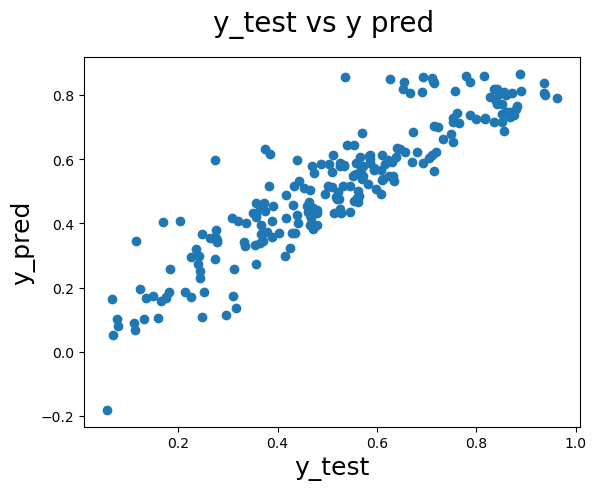

In [105]:

fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=18)
plt.show()

## R2 score

In [106]:
r2_score(y_test, y_pred)

0.823407236790792

### we can see that the Final model on test has Rsquared has value of 0.825 and that of the test has a value of 0.823 

## Adjust R2_score

In [107]:
r2=0.8234
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8140154589371981

### Adjusted R2_score  of 0.814

## CONCLUSION

We can see that the equation of our best fitted line is:

$ cnt=0.304179 + yr \times 0.234127 + temp \times 0.36790 - windspeed \times 0.148355 -Spring \times 0.114329 + Winter \times 0.070252 - December \times 0.069165 - January \times 0.049145 - November \times 0.069766 + September \times 0.060410 -  Light_Snow_Rain \times 0.311584- Mist_Cloudy \times 0.072506 $

Overall we have a decent model and is able to  generalize  well on test set

### The major factors are found to be 
1.Temp: coefficient of  0.36790 with every rise in unit temp the value of cnt increases by 0.36790 units

2.light_snow_rain: coefficient of 0.311584, with every unit rise in this variable the value of cnt decreases by 0.311584 units

3.yr :with a coefficient of 0.234127, with every unit rise in this variable the value of cnt increasse by 0.234127 units


### Other notable ones

1.Windspeed 

2.Spring
